#BME3508 - Lecture 06
Fourier Transform The F-Domain


Cool video with special body suit
https://www.youtube.com/watch?v=Tb-sm05zJzQ

Website for suit

https://www.ottobock.com/en-gb/home-uk

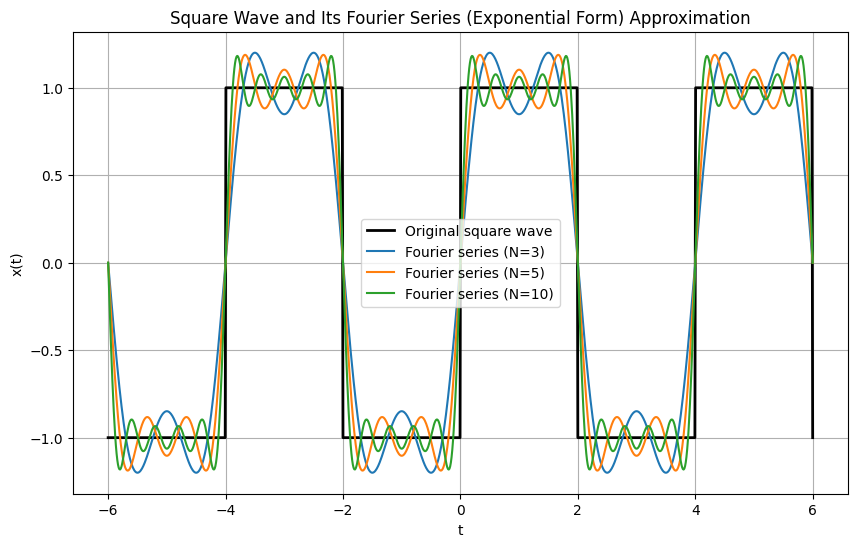

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Period and fundamental frequency:
T = 4        # period of the square wave
w0 = 2 * np.pi / T   # fundamental angular frequency, equals pi/2

# Define the square wave signal: +1 if t mod T < 2, otherwise -1.
def x_t(t):
    return np.where((t % T) < 2, 1, -1)

# Fourier series coefficient for k ≠ 0
def C_k(k):
    # Use the derived formula:
    # C_k = (2 * exp(-j*pi*k/2) * sin(pi*k/2)) / (pi*k)
    return (2 * np.exp(-1j * np.pi * k / 2) * np.sin(np.pi * k / 2)) / (np.pi * k)

# Fourier series approximation of x(t) using N harmonics (both positive and negative)
def fourier_series(t, N):
    result = np.zeros_like(t, dtype=complex)
    # For a balanced square wave, the DC term (C_0) is zero.
    # We sum over positive harmonics and add the corresponding negative ones (their conjugates).
    for k in range(1, N+1):
        ck = C_k(k)
        result += ck * np.exp(1j * k * w0 * t) + np.conjugate(ck) * np.exp(-1j * k * w0 * t)
    return result.real  # Return the real part since the signal is real

# Create a time vector covering several periods
t = np.linspace(-6, 6, 1000)

# Compute the original signal and its Fourier approximations for various numbers of terms
x_orig = x_t(t)

plt.figure(figsize=(10, 6))
plt.plot(t, x_orig, 'k', label='Original square wave', linewidth=2)

# Plot Fourier approximations using N = 3, 5, and 10 harmonics
for N in [3, 5, 10]:
    x_approx = fourier_series(t, N)
    plt.plot(t, x_approx, label=f'Fourier series (N={N})')

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Square Wave and Its Fourier Series (Exponential Form) Approximation')
plt.legend()
plt.grid(True)
plt.show()

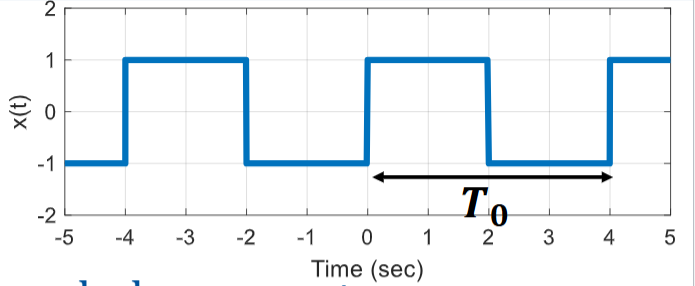


#Example 2.7
# Solution: Complex Exponential Fourier Series Analysis
# SOLVING FOR THE COEFFECIENT MODEL

#Step 0: Inspect x(t)


*   Symmetry: even, odd, neither?
*   DC offset?
*   $$ T_0 = ? , f_0 = ? , w_0 = ?$$

$$T_0 = 4s, f_0 = \frac{1}{4}, w_0 = 2\pi \frac{1}{4} = \frac{\pi}{2} $$

#Step 1: Express x(t) over one period

$$
f(x) =
\begin{cases}
1 & \text{if } 0 \leq x < 2 \\
-1 & \text{if } 2 \leq x < 4
\end{cases}
$$

#Step 2: Define $D_k$


$$
D_k = \frac{1}{T_0} \int_0^{T_0} x(t) e^{-j k \omega_0 t} \, dt = \frac{1}{T_0} \int_0^{T_0} x(t) e^{-j \frac{\pi}{2}kt} \ dt
$$

# Step 3: Find $D_k$

We start by using the formula for $D_k$ previously defined:

$$
D_k = \frac{1}{T_0} \int_0^{T_0} x(t) e^{-j k \omega_0 t} \, dt
$$

Substitute $ T_0 = 4 $ and $ w_0 = \frac{\pi}{2} $:

$$
D_k = \frac{1}{4} \int_0^4 x(t) e^{-j \frac{\pi}{2} k t} \, dt
$$

We now break the integral into two parts, based on the piecewise definition of $ x(t) $

$$
D_k = \frac{1}{4} \left( \int_0^2 1 \cdot e^{-j \frac{\pi}{2} k t} \, dt + \int_2^4 (-1) \cdot e^{-j \frac{\pi}{2} k t} \, dt \right)
$$

# Step 4: Solve each integral

For the first integral:

$$
\int_0^2 e^{-j \frac{\pi}{2} k t} \, dt = \left[ \frac{e^{-j \frac{\pi}{2} k t}}{-j \frac{\pi}{2} k} \right]_0^2 = \frac{e^{-j \pi k} - 1}{-j \pi k / 2}
$$

Simplify the expression:

$$
\frac{e^{-j \pi k} - 1}{-j \pi k / 2} = \frac{2}{j \pi k} (e^{-j \pi k} - 1)
$$

For the second integral:

$$
\int_2^4 -e^{-j \frac{\pi}{2} k t} \, dt = -\left[ \frac{e^{-j \frac{\pi}{2} k t}}{-j \frac{\pi}{2} k} \right]_2^4 = \frac{e^{-j 2 \pi k} - e^{-j \pi k}}{-j \pi k / 2}
$$

Simplify the expression:

$$
\frac{e^{-j 2 \pi k} - e^{-j \pi k}}{-j \pi k / 2} = \frac{2}{j \pi k} (e^{-j 2 \pi k} - e^{-j \pi k})
$$

# Step 5: Combine the results

Now, combining both parts:

$$
D_k = \frac{1}{4} \left( \frac{2}{j \pi k} (e^{-j \pi k} - 1) + \frac{2}{j \pi k} (e^{-j 2 \pi k} - e^{-j \pi k}) \right)
$$

Factor out $ \frac{2}{j \pi k} $:

$$
D_k = \frac{1}{4} \cdot \frac{2}{j \pi k} \left( (e^{-j \pi k} - 1) + (e^{-j 2 \pi k} - e^{-j \pi k}) \right)
$$

Simplify the expression:

$$
D_k = \frac{1}{2 j \pi k} \left( e^{-j \pi k} - 1 + e^{-j 2 \pi k} - e^{-j \pi k} \right)
$$

Finally, we can simplify further to obtain the final result:

$$
D_k = \frac{1}{2 j \pi k} \left( e^{-j 2 \pi k} - 1 \right)
$$


### Next: Evaluate $ D_k $ for $ k = 0, \pm1, \pm2, \pm3 $ (first three harmonics) and find $ D_k $ & $ \angle D_k $

To evaluate $ D_k $ for different values of $ k $, we use the formula:

$$ D_k = \frac{1}{2 j \pi k} \left( e^{-j 2 \pi k} - 1 \right) $$

Now, we substitute the values of $ k = 0, \pm1, \pm2, \pm3 $ to compute $ D_k $ for the first three harmonics.

#### For $ k = 0 $:

$$
D_0 = \frac{1}{2 j \pi 0} \left( e^{-j 2 \pi 0} - 1 \right) = 0
$$

#### For $ k = \pm 1 $:

$$
D_1 = \frac{1}{2 j \pi 1} \left( e^{-j 2 \pi 1} - 1 \right) = \frac{1}{2 j \pi} \left( -1 - 1 \right) = \frac{-2}{2 j \pi} = \frac{-1}{j \pi}
$$

Similarly, for $ k = -1 $, we get:

$$
D_{-1} = \frac{-1}{j \pi}
$$

#### For $ k = \pm 2 $:

$$
D_2 = \frac{1}{2 j \pi 2} \left( e^{-j 2 \pi 2} - 1 \right) = \frac{1}{4 j \pi} \left( 1 - 1 \right) = 0
$$

Similarly, for $ k = -2 $, we get:

$$
D_{-2} = 0
$$

#### For $ k = \pm 3 $:

$$
D_3 = \frac{1}{2 j \pi 3} \left( e^{-j 2 \pi 3} - 1 \right) = \frac{1}{6 j \pi} \left( -1 - 1 \right) = \frac{-2}{6 j \pi} = \frac{-1}{3 j \pi}
$$

Similarly, for $ k = -3 $, we get:

$$
D_{-3} = \frac{-1}{3 j \pi}
$$

#### Phase of $ D_k $ ($ \angle D_k $):

To find the phase $ \angle D_k $, we can calculate the argument (angle) of the complex numbers:

For $ k = \pm 1 $:

$$
\angle D_1 = \angle \left( \frac{-1}{j \pi} \right) = -90^\circ
$$

For $ k = -1 $:

$$
\angle D_{-1} = \angle \left( \frac{-1}{j \pi} \right) = -90^\circ
$$

For $ k = \pm 3 $:

$$
\angle D_3 = \angle \left( \frac{-1}{3 j \pi} \right) = -90^\circ
$$

For $ k = -3 $:

$$
\angle D_{-3} = \angle \left( \frac{-1}{3 j \pi} \right) = -90^\circ
$$

Thus, for all values of $ k $, we observe that $ D_k $ has a phase of $ -90^\circ $ for $ k \neq 0 $.


### Step 4: Plug $ D_k $ into the Fourier Series

The Fourier Series for a periodic function $ x(t) $ is given by:

$$
x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j k \omega_0 t}
$$

Where $ D_k $ are the Fourier coefficients, and $ \omega_0 $ is the fundamental frequency.

The Fourier Series representation of $ x(t) $ is:

$$
x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j k \omega_0 t}
$$

Substituting the formula for $ D_k $:

$$
D_k = \frac{1}{2 j \pi k} \left( e^{-j 2 \pi k} - 1 \right)
$$

we get:

$$
x(t) = \sum_{k=-\infty}^{\infty} \frac{1}{2 j \pi k} \left( e^{-j 2 \pi k} - 1 \right) e^{j k \omega_0 t}
$$


### Step 5: Substitute $ D_k $ for $ k = 0, \pm1, \pm2, \pm3 $

Remember that computationally we would have skipped finding each coeffecient given the computer can do this for us with the formula, but given we did it by hand rather than trying to calculate the entirety of the expression at once we had precalculated the $D_k$ values for 1, -1, 2, -2, 3, -3.

From the previous steps, we have the following values for $ D_k $:

- $ D_0 = 0 $
- $ D_{\pm 1} = \frac{-1}{j \pi} $
- $ D_{\pm 2} = 0 $
- $ D_{\pm 3} = \frac{-1}{3 j \pi} $

Substitute these values into the Fourier Series equation:

$$
x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j k \omega_0 t}
$$

For the first three harmonics (considering only $ k = 0, \pm1, \pm2, \pm3 $), the series becomes:

$$
x(t) = D_0 e^{j 0 \omega_0 t} + D_1 e^{j \omega_0 t} + D_{-1} e^{-j \omega_0 t} + D_2 e^{j 2 \omega_0 t} + D_{-2} e^{-j 2 \omega_0 t} + D_3 e^{j 3 \omega_0 t} + D_{-3} e^{-j 3 \omega_0 t}
$$

Now, substitute the values of $ D_k $:

$$
x(t) = 0 \cdot e^{j 0 \omega_0 t} + \frac{-1}{j \pi} e^{j \omega_0 t} + \frac{-1}{j \pi} e^{-j \omega_0 t} + 0 \cdot e^{j 2 \omega_0 t} + 0 \cdot e^{-j 2 \omega_0 t} + \frac{-1}{3 j \pi} e^{j 3 \omega_0 t} + \frac{-1}{3 j \pi} e^{-j 3 \omega_0 t}
$$

This simplifies to:

$$
x(t) = \frac{-1}{j \pi} \left( e^{j \omega_0 t} + e^{-j \omega_0 t} \right) + \frac{-1}{3 j \pi} \left( e^{j 3 \omega_0 t} + e^{-j 3 \omega_0 t} \right)
$$

This is the complete Fourier Series for the given function $ x(t) $.


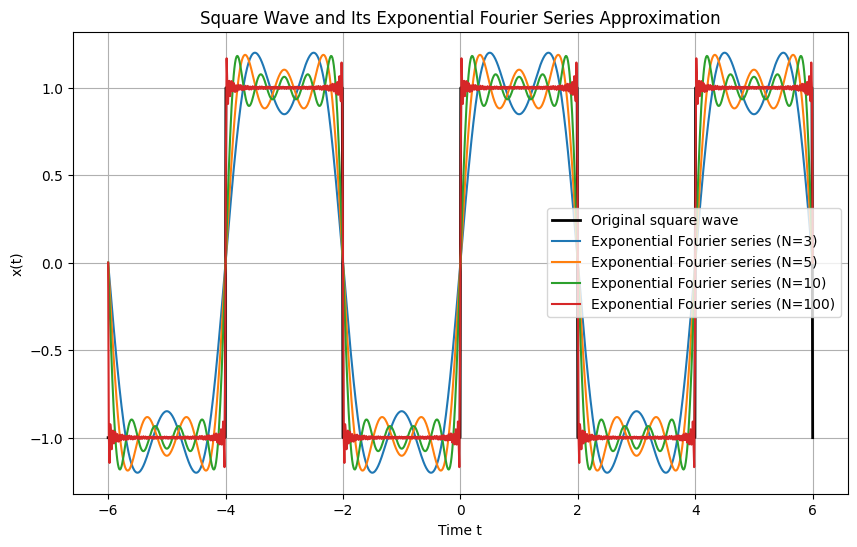

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the period and fundamental angular frequency
T = 4                     # Period of the square wave
w0 = 2 * np.pi / T        # Fundamental angular frequency (pi/2)

# Define the square wave signal
def x_t(t):
    # Returns +1 if t mod T < 2, otherwise -1
    return np.where((t % T) < 2, 1, -1)

# Define the Fourier coefficients for the exponential Fourier series:
# For k ≠ 0, C(k) = [2 * exp(-j*pi*k/2) * sin(pi*k/2)] / (pi*k), and C(0) = 0.
def C(k):
    if k == 0:
        return 0.0
    return (2 * np.exp(-1j * np.pi * k / 2) * np.sin(np.pi * k / 2)) / (np.pi * k)

# Define the Fourier series approximation using exponential form, summing from k = -N to N
def fourier_series_exp(t, N):
    result = np.zeros_like(t, dtype=complex)
    for k in range(-N, N + 1):
        result += C(k) * np.exp(1j * k * w0 * t)
    return result.real  # Return real part because the original signal is real

# Create a time vector over several periods
t = np.linspace(-6, 6, 1000)
x_original = x_t(t)

# Plot the original square wave and its Fourier series approximations
plt.figure(figsize=(10, 6))
plt.plot(t, x_original, 'k', label='Original square wave', linewidth=2)

# Compute and plot Fourier approximations for various numbers of harmonics (N = 3, 5, and 10)
for N in [3, 5, 10, 100]:
    x_approx = fourier_series_exp(t, N)
    plt.plot(t, x_approx, label=f'Exponential Fourier series (N={N})')

plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.title('Square Wave and Its Exponential Fourier Series Approximation')
plt.legend()
plt.grid(True)
plt.show()